In [16]:
import pandas as pd 
from pandas_profiling import ProfileReport
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='png'

In [2]:
data1 = pd.read_csv('./data/prad_Liu_FPKM_1.5CPMcutoff.csv')
data2 = pd.read_csv('./data/prad_Liu_FPKM_2CPMcutoff.csv')

In [3]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16247 entries, 0 to 16246
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   gene     16247 non-null  object 
 1   C42_1    16247 non-null  float64
 2   C42_2    16247 non-null  float64
 3   C42_3    16247 non-null  float64
 4   C42B_1   16247 non-null  float64
 5   C42B_2   16247 non-null  float64
 6   C42B_3   16247 non-null  float64
 7   LNCAP_1  16247 non-null  float64
 8   LNCAP_2  16247 non-null  float64
 9   LNCAP_3  16247 non-null  float64
 10  MR49F_1  16247 non-null  float64
 11  MR49F_2  16247 non-null  float64
 12  MR49F_3  16247 non-null  float64
dtypes: float64(12), object(1)
memory usage: 1.6+ MB


In [4]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15447 entries, 0 to 15446
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   gene     15447 non-null  object 
 1   C42_1    15447 non-null  float64
 2   C42_2    15447 non-null  float64
 3   C42_3    15447 non-null  float64
 4   C42B_1   15447 non-null  float64
 5   C42B_2   15447 non-null  float64
 6   C42B_3   15447 non-null  float64
 7   LNCAP_1  15447 non-null  float64
 8   LNCAP_2  15447 non-null  float64
 9   LNCAP_3  15447 non-null  float64
 10  MR49F_1  15447 non-null  float64
 11  MR49F_2  15447 non-null  float64
 12  MR49F_3  15447 non-null  float64
dtypes: float64(12), object(1)
memory usage: 1.5+ MB


# genes 1.5 is a little bigger since it has more genes

In [5]:
genes_unique_in_first = set(data1.gene) - set(data2.gene)
genes_unique_in_second = set(data2.gene) - set(data1.gene)
len(genes_unique_in_first), len(genes_unique_in_second)

(800, 0)

# Small unsupervised analysis

In [6]:
from sklearn.manifold import TSNE
X = data2[data2.columns[1:]].values
X_embedded = TSNE(n_components=2).fit_transform(X)

In [7]:
df = pd.DataFrame({'x':X_embedded[:,0],'y':X_embedded[:,1]})
df.head()

,x,y
0,26.342104,-47.920906
1,30.514435,-45.484364
2,3.342752,-47.273102
3,14.001947,-40.417915
4,45.594719,-56.191528


<AxesSubplot:xlabel='x', ylabel='y'>

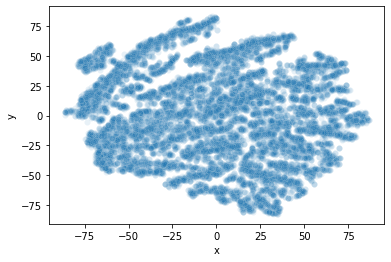

In [17]:
sns.scatterplot(data=df,x='x',y='y' ,alpha = 0.1)

There appears to be 3 clusters

# PCA

In [18]:
from sklearn.decomposition import PCA
X_pca = PCA(n_components=2).fit_transform(X)

In [19]:
df = pd.DataFrame({'x':X_pca[:,0],'y':X_pca[:,1]})
df.head()

,x,y
0,26.615567,349.679985
1,171.190421,59.749431
2,-227.940566,302.880964
3,-200.771066,289.792392
4,1168.410025,100.063979


<AxesSubplot:xlabel='x', ylabel='y'>

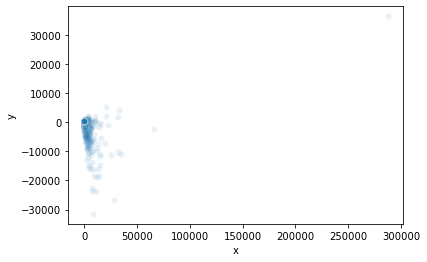

In [20]:
sns.scatterplot(data=df,x='x',y='y' ,alpha = 0.1)

# Using a log scale

In [21]:
for col in data2.columns[1:] :
    data2[col] = np.log(data2[col]+1)

# Small unsupervised analysis with Log Scale

In [22]:
from sklearn.manifold import TSNE
X = data2[data2.columns[1:]].values
X_embedded = TSNE(n_components=2).fit_transform(X)

In [30]:
df = pd.DataFrame({'x':X_embedded[:,0],'y':X_embedded[:,1]})
df.head()

,x,y
0,-50.803802,-11.843231
1,-18.441540,-60.042683
2,-51.285164,-11.333673
3,-52.806740,-19.868967
4,-49.266422,-45.803596


<AxesSubplot:xlabel='x', ylabel='y'>

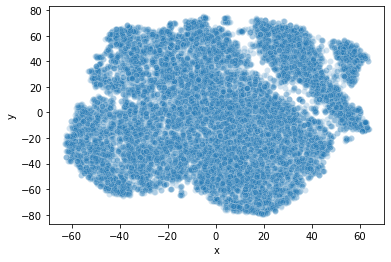

In [32]:
sns.scatterplot(data=df,x='x',y='y' ,alpha = 0.2)

There appears to be 3 clusters

# PCA with Log Scale

In [25]:
from sklearn.decomposition import PCA
X_pca = PCA(n_components=2).fit_transform(X)

In [26]:
df = pd.DataFrame({'x':X_pca[:,0],'y':X_pca[:,1]})
df.head()

,x,y
0,0.096733,-1.034242
1,5.339736,-0.790535
2,0.908164,-2.664724
3,1.638150,0.067234
4,5.881646,-0.054155


<AxesSubplot:xlabel='x', ylabel='y'>

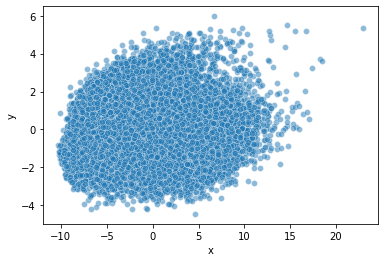

In [28]:
sns.scatterplot(data=df,x='x',y='y' ,alpha = 0.5)